In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans

In [3]:
# get data
data = pd.read_csv('banknote.csv')
OpenML_data = pd.read_csv('openML_banknote_authentication_dataset.csv')

In [4]:
OpenML_data.head()

,id,V1,V2,V3,V4,Class
0,1,3.62160,8.6661,-2.8073,-0.44699,1
1,2,4.54590,8.1674,-2.4586,-1.46210,1
2,3,3.86600,-2.6383,1.9242,0.10645,1
3,4,3.45660,9.5228,-4.0112,-3.59440,1
4,5,0.32924,-4.4552,4.5718,-0.98880,1


In [107]:
# normalise data
normed_data = data.copy()
normed_data = (normed_data - normed_data.min()) / (normed_data.max()
                                                   - normed_data.min())
# apply k-means clustering to this data
# convert the dataframe into numpy
numpy_data = np.column_stack((normed_data.V1, normed_data.V2))
# create the k_means analysis
km_res = KMeans(n_clusters=2).fit(numpy_data)
# find the clusters coordinates
clusters = km_res.cluster_centers_

# map which data point belong to which clusters
cluster_groups = km_res.predict(numpy_data)
cluster_groups

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

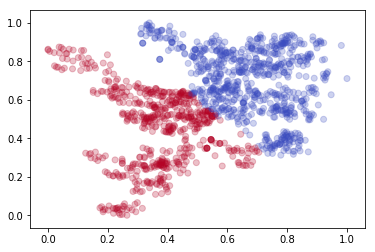

In [108]:
# scatter plot with colour legend
fig, ax = plt.subplots()
'''
for index, row in normed_data.iterrows():
    ax.scatter(row['V2'], row['V2'],
               label=cluster_groups[index], c=cluster_groups[index],
               alpha=0.25, cmap="coolwarm")
    
ax.legend()
'''

scatter = ax.scatter(normed_data['V1'], normed_data['V2'], 
           label=cluster_groups, c=cluster_groups,
           alpha=0.25, cmap="coolwarm")

plt.show()

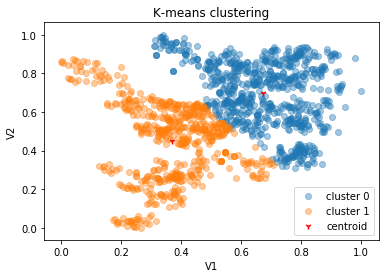

In [132]:
label_name = ['cluster 0', 'cluster 1']

for index, label in enumerate(label_name):
    cluster_index = np.where(cluster_groups == index)
    temp = normed_data.iloc[cluster_index]
    plt.scatter(temp['V1'],temp['V2'],
                label=label, alpha=0.4)
    
plt.scatter(clusters[:,0], clusters[:,1], c='r', marker='1',
            label='centroid')
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means clustering')
plt.show()
    

In [130]:
# compare to the class from the OpenML file to determine accuracy
OpenML_class = OpenML_data.Class
def get_accuracy(cluster_result):
    new = pd.DataFrame(np.column_stack((OpenML_class, cluster_result + 1)))
    accuracy = (len(new) - len(new[ new[0] != new[1] ]))/len(new)*100
    return accuracy

first_accuracy = get_accuracy(cluster_groups)
print(f'{first_accuracy} %')

87.24489795918367 %


## show the stability of the algorithm:
accuracy:
- show if the accuracy changed for each repetition

centroid position:
- make a dataframe:
    - centroid 1x, centroid1y, centroid2x, centroid2y,
    - will then get the mean and std
    - will then be able to mark the mean and std for both


In [136]:
copy_normed = normed_data.copy()
copy_normed['KMeans'] = km_res.labels_
copy_normed.groupby('KMeans').describe()

V1                                                              \
        count      mean       std       min       25%       50%       75%   
KMeans                                                                      
0       765.0  0.673649  0.140927  0.310105  0.572011  0.689758  0.787927   
1       607.0  0.369559  0.135632  0.000000  0.285489  0.376450  0.457274   

                     V2                                                    \
             max  count      mean       std       min       25%       50%   
KMeans                                                                      
0       1.000000  765.0  0.697981  0.167841  0.312426  0.576074  0.725744   
1       0.705176  607.0  0.447812  0.196580  0.000000  0.280486  0.491676   

                           
             75%      max  
KMeans                     
0       0.840496  1.00000  
1       0.589277  0.87464

In [138]:
OpenML_normed = (OpenML_data - OpenML_data.min()) / (OpenML_data.max()
                                                   - OpenML_data.min())

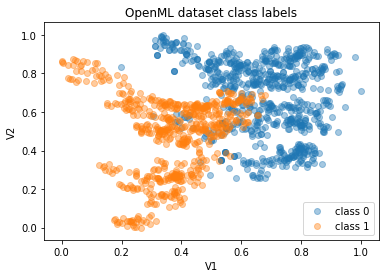

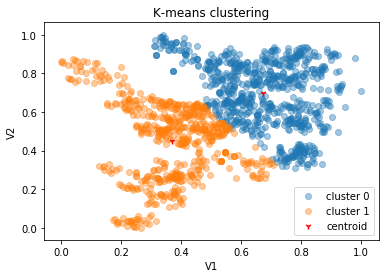

In [144]:
label_name = ['class 0', 'class 1']

for index, label in enumerate(label_name):
    temp = OpenML_normed[ OpenML_normed['Class'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('OpenML dataset class labels')
plt.show()

label_name = ['cluster 0', 'cluster 1']

for index, label in enumerate(label_name):
    cluster_index = np.where(cluster_groups == index)
    temp = normed_data.iloc[cluster_index]
    plt.scatter(temp['V1'],temp['V2'],
                label=label, alpha=0.4)
    
plt.scatter(clusters[:,0], clusters[:,1], c='r', marker='1',
            label='centroid')
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means clustering')
plt.show()

In [177]:
Kmeans_repetition = clusters.reshape(1,4)
Kmeans_repetition

array([[0.67364922, 0.69798136, 0.36955897, 0.44781178]])

In [195]:
x = np.array([1,2,3,4])
x = np.vstack((x, Kmeans_repetition))
x

array([[1.        , 2.        , 3.        , 4.        ],
       [0.67364922, 0.69798136, 0.36955897, 0.44781178]])

In [235]:
repetitions = {
    'Cluster0x': [],
    'Cluster0y': [],
    'Cluster1x': [],
    'Cluster1y': [],
    'Cluster_group': []
}

In [237]:
def store_in_dict(clusters, cluster_groups):
    for index, key in enumerate(repetitions):
        flatten = clusters.ravel()
        if index < 4:
            repetitions[key].append(flatten[index])
        else:
            repetitions[key].append(cluster_groups)

store_in_dict(clusters, cluster_groups)

In [238]:
# repeat kmeans several times
iterations = 10
for i in range(iterations):
    km_result = KMeans(n_clusters=2).fit(numpy_data)
    centroid = km_result.cluster_centers_
    groups = km_result.predict(numpy_data)
    
    store_in_dict(clusters=centroid, cluster_groups=groups)

In [239]:
repetitions

{'Cluster0x': [0.6736492185722553,
  0.3695589683814764,
  0.673404101341913,
  0.6737854790867205,
  0.3695589683814764,
  0.6737854790867205,
  0.6737854790867205,
  0.3695589683814764,
  0.3698878947254558,
  0.3698878947254558,
  0.3695589683814764],
 'Cluster0y': [0.6979813614445093,
  0.4478117764542756,
  0.69787255242632,
  0.6982199770308766,
  0.4478117764542756,
  0.6982199770308766,
  0.6982199770308766,
  0.4478117764542756,
  0.4479234002651401,
  0.4479234002651401,
  0.4478117764542756],
 'Cluster1x': [0.3695589683814764,
  0.6736492185722553,
  0.3693670039396473,
  0.3698878947254558,
  0.6736492185722553,
  0.3698878947254558,
  0.3698878947254558,
  0.6736492185722553,
  0.6737854790867205,
  0.6737854790867205,
  0.6736492185722553],
 'Cluster1y': [0.4478117764542756,
  0.6979813614445093,
  0.4475364928287685,
  0.4479234002651401,
  0.6979813614445093,
  0.4479234002651401,
  0.4479234002651401,
  0.6979813614445093,
  0.6982199770308766,
  0.6982199770308766,
  

In [240]:
repetition_df = pd.DataFrame(repetitions)

In [244]:
repetition_df

,Cluster0x,Cluster0y,Cluster1x,Cluster1y,Cluster_group
0,0.673649,0.697981,0.369559,0.447812,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,0.369559,0.447812,0.673649,0.697981,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
2,0.673404,0.697873,0.369367,0.447536,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,0.673785,0.698220,0.369888,0.447923,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,0.369559,0.447812,0.673649,0.697981,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
5,0.673785,0.698220,0.369888,0.447923,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
6,0.673785,0.698220,0.369888,0.447923,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
7,0.369559,0.447812,0.673649,0.697981,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
8,0.369888,0.447923,0.673785,0.698220,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
9,0.369888,0.447923,0.673785,0.698220,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."


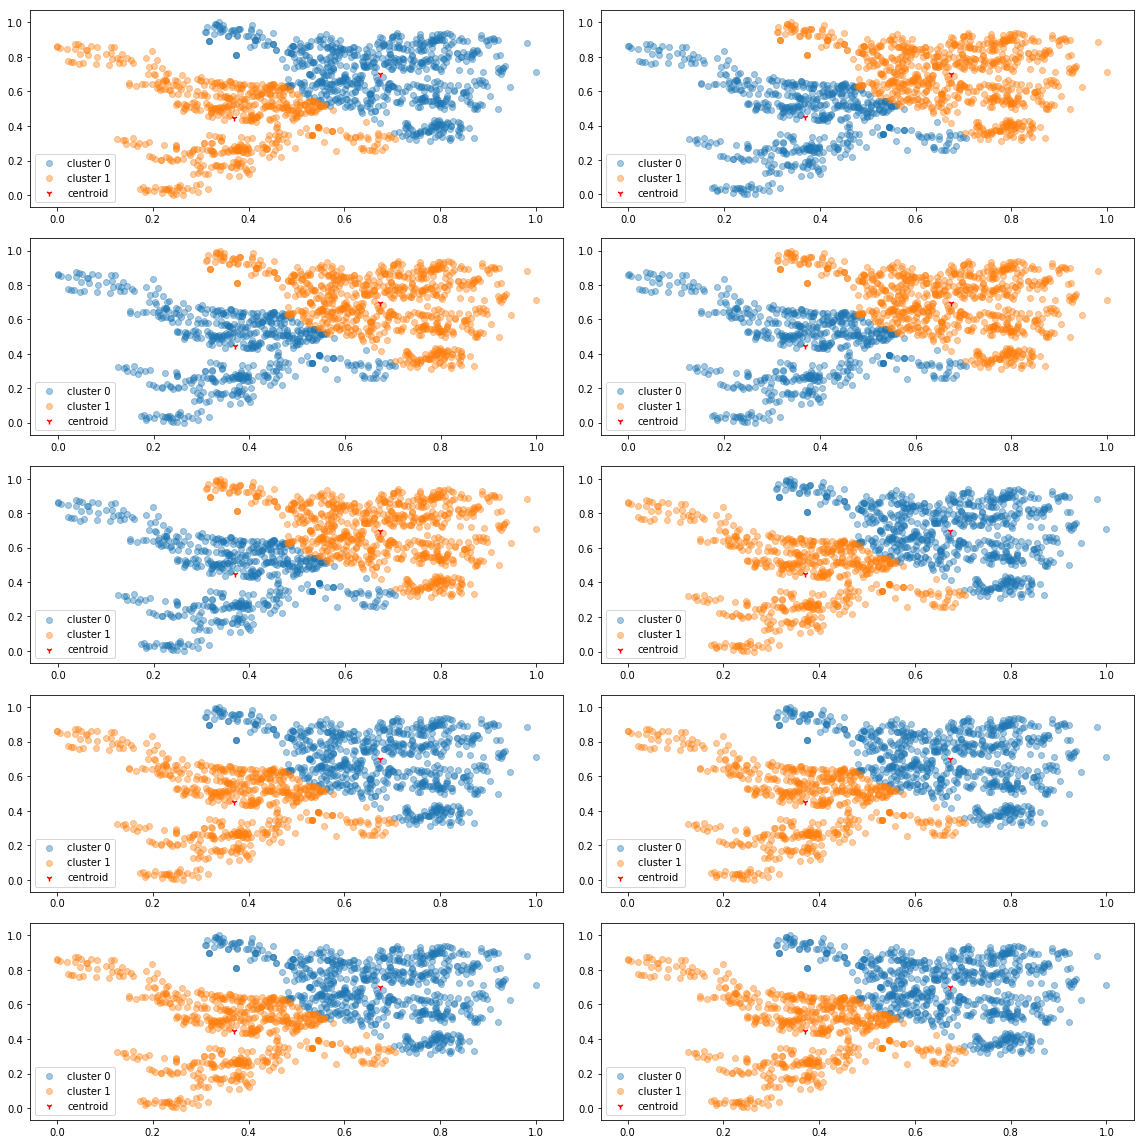

In [290]:

label_name = ['cluster 0', 'cluster 1']
fig, ax = plt.subplots(5, 2, figsize=(16, 16))
ax = np.ravel(ax)

for i in range(iterations):
    km_result = KMeans(n_clusters=2).fit(numpy_data)
    centroid = km_result.cluster_centers_
    groups = km_result.labels_

    for index, label in enumerate(label_name):
        cluster_index = np.where(groups == index)
        temp = normed_data.iloc[cluster_index]
        ax[i].scatter(temp['V1'],temp['V2'],
                    label=label, alpha=0.4)

    ax[i].scatter(centroid[:,0], centroid[:,1], c='r', marker='1',
                label='centroid')

    ax[i].legend()

plt.tight_layout()
plt.show()
    

In [279]:
copy_normed = normed_data.copy()
copy_normed['KMeans'] = km_res.labels_
copy_normed.groupby('KMeans').describe()

V1                                                              \
        count      mean       std       min       25%       50%       75%   
KMeans                                                                      
0       765.0  0.673649  0.140927  0.310105  0.572011  0.689758  0.787927   
1       607.0  0.369559  0.135632  0.000000  0.285489  0.376450  0.457274   

                     V2                                                    \
             max  count      mean       std       min       25%       50%   
KMeans                                                                      
0       1.000000  765.0  0.697981  0.167841  0.312426  0.576074  0.725744   
1       0.705176  607.0  0.447812  0.196580  0.000000  0.280486  0.491676   

                           
             75%      max  
KMeans                     
0       0.840496  1.00000  
1       0.589277  0.87464

In [316]:
for item in repetitions['Cluster_group']:
    copy_normed = normed_data.copy()
    copy_normed['KMeans'] = item
    group_by = copy_normed.groupby('KMeans').describe()
    display()

SyntaxError: invalid syntax (<ipython-input-316-2332616ee81a>, line 5)

In [296]:
for group in repetitions['Cluster_group']:
    if group[0] == 1:
        group = group[::-1]
    accuracy = get_accuracy(group)
    print(f'Accuracy: {accuracy}%')

Accuracy: 87.24489795918367%
Accuracy: 78.49854227405247%
Accuracy: 87.24489795918367%
Accuracy: 87.24489795918367%
Accuracy: 78.49854227405247%
Accuracy: 87.24489795918367%
Accuracy: 87.24489795918367%
Accuracy: 78.49854227405247%
Accuracy: 78.49854227405247%
Accuracy: 78.49854227405247%
Accuracy: 78.49854227405247%


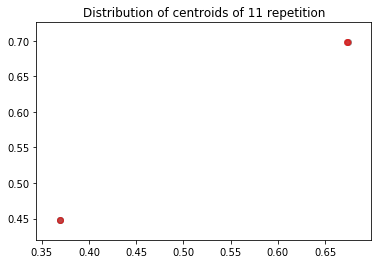

In [298]:
plt.scatter(repetition_df['Cluster0x'], repetition_df['Cluster0y'],
           alpha=0.2, c='c')
plt.scatter(repetition_df['Cluster1x'], repetition_df['Cluster1y'],
            alpha=0.2, c='r')
plt.title('Distribution of centroids of 11 repetition')
plt.show()

In [317]:
for group in repetitions['Cluster_group']:
    accuracy = get_accuracy(group)
    print(f'Accuracy: {accuracy}%')

Accuracy: 87.24489795918367%
Accuracy: 12.755102040816327%
Accuracy: 87.24489795918367%
Accuracy: 87.24489795918367%
Accuracy: 12.755102040816327%
Accuracy: 87.24489795918367%
Accuracy: 87.24489795918367%
Accuracy: 12.755102040816327%
Accuracy: 12.755102040816327%
Accuracy: 12.755102040816327%
Accuracy: 12.755102040816327%


Figure 1: K-means clustering
- This first figure is the result of the clustering done using K-means algorithm.
- Each data points and their centroids are marked as above.
- It is seen with the above that Kmeans partition the dataset into two distinct clusters

Figure 2-8: Repetition of the K-means clustering:
- The Algorithm is repeated another 10 times, resulting in the graph in Figure 2 and 3.
- Although the algorithm randomly select which centroid will be the first and second cluster, the resulting clustering is still very similar.
- Figure 4-6 shows the description when the plotted dataset is grouped by the cluster. This display that the two clusters consistently have similar number of data points, mean, and standard deviations across each repetitions.
- Figure 5 displays the coordinate for the cluster groups of each repetition, and there is very negligible fluctuations further proved by Figure 6 as both cetroid coordinate almost exactly overlaps each other.

conslusion: The K-means algorithm is stable

Figure 9: Accuracy:
- When compared to the labelled class from the OpenML dataset in Figure 9, it is obvious that the clustering using with K-means algorithm is not entirely accurate.
- Specifically, when compared to the original label of the data set, the K-means clustering resulted in around 87.24% accuracy